In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

df=pd.read_csv('loan_application.csv')
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [294]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [295]:
df.shape

(614, 13)

In [296]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [297]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [298]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [299]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [300]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [301]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [302]:
#nan is removed from row
df.dropna(inplace=True)
df.count()

Loan_ID              480
Gender               480
Married              480
Dependents           480
Education            480
Self_Employed        480
ApplicantIncome      480
CoapplicantIncome    480
LoanAmount           480
Loan_Amount_Term     480
Credit_History       480
Property_Area        480
Loan_Status          480
dtype: int64

In [303]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [304]:
df.drop(['Loan_ID','','Dependents','Education'],axis=1,inplace=True)
df.head(5)

,Gender,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [305]:
#coverting variable to quantity data
vgender=pd.get_dummies(df['Gender'],drop_first=True)
vgender.head(5)

,Male
1,1
2,1
3,1
4,1
5,1


In [306]:
df=pd.concat((df,vgender),axis=1)
df.head(5)

,Gender,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male
1,Male,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,Male,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,Male,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,Male,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1
5,Male,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,1


In [307]:
df.drop(['Gender'],axis=1,inplace=True)
df.head(5)

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male
1,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1
5,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,1


In [308]:
vself_employed=pd.get_dummies(df['Self_Employed'],drop_first=True)
vself_employed.head(5)

,Yes
1,0
2,1
3,0
4,0
5,1


In [309]:
df=pd.concat((df,vself_employed),axis=1)
df.head(5)

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,Yes
1,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,0
2,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1
3,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,0
4,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0
5,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,1,1


In [310]:
df.drop(['Self_Employed'],axis=1,inplace=True)
df.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,Yes
1,4583,1508.0,128.0,360.0,1.0,Rural,N,1,0
2,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1
3,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,0
4,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0
5,5417,4196.0,267.0,360.0,1.0,Urban,Y,1,1


In [311]:
vproperty_arear=pd.get_dummies(df['Property_Area'],drop_first=True)
vproperty_arear.head(5)

,Semiurban,Urban
1,0,0
2,0,1
3,0,1
4,0,1
5,0,1


In [312]:
df=pd.concat((df,vproperty_arear),axis=1)
df.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,Yes,Semiurban,Urban
1,4583,1508.0,128.0,360.0,1.0,Rural,N,1,0,0,0
2,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,0,1
3,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,1
5,5417,4196.0,267.0,360.0,1.0,Urban,Y,1,1,0,1


In [313]:
df.drop(['Property_Area'],axis=1,inplace=True)
df.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Yes,Semiurban,Urban
1,4583,1508.0,128.0,360.0,1.0,N,1,0,0,0
2,3000,0.0,66.0,360.0,1.0,Y,1,1,0,1
3,2583,2358.0,120.0,360.0,1.0,Y,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,Y,1,0,0,1
5,5417,4196.0,267.0,360.0,1.0,Y,1,1,0,1


In [314]:
vloanstatus=pd.get_dummies(df['Loan_Status'],drop_first=True)
vloanstatus.head(5)

,Y
1,0
2,1
3,1
4,1
5,1


In [315]:
df=pd.concat((df,vloanstatus),axis=1)
df.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Yes,Semiurban,Urban,Y
1,4583,1508.0,128.0,360.0,1.0,N,1,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,Y,1,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,Y,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,Y,1,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,Y,1,1,0,1,1


In [316]:
df.drop(['Loan_Status'],axis=1,inplace=True)
df.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Semiurban,Urban,Y
1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,1


In [317]:
df.rename(columns={'Male':'Gender','Yes':'Self_Employed','Y':'Loan_Status'},inplace=True)
df.head(6)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Self_Employed,Semiurban,Urban,Loan_Status
1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,1
6,2333,1516.0,95.0,360.0,1.0,1,0,0,1,1


In [323]:
#filling of missing data of normalized losses with the average of the remaining
df_temp=df[df['CoapplicantIncome']!='0']
avg1=df_temp['CoapplicantIncome'].astype(float).mean()
df['CoapplicantIncome']=df['CoapplicantIncome'].replace(0,avg1).astype(float)

df_temp=df[df['ApplicantIncome']!='0']
avg1=df_temp['ApplicantIncome'].astype(float).mean()
df['ApplicantIncome']=df['ApplicantIncome'].replace(0,avg1).astype(float)

df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Self_Employed,Semiurban,Urban,Loan_Status
1,4583.0,1508.000000,128.0,360.0,1.0,1,0,0,0,0
2,3000.0,1581.093583,66.0,360.0,1.0,1,1,0,1,1
3,2583.0,2358.000000,120.0,360.0,1.0,1,0,0,1,1
4,6000.0,1581.093583,141.0,360.0,1.0,1,0,0,1,1
5,5417.0,4196.000000,267.0,360.0,1.0,1,1,0,1,1


<AxesSubplot:xlabel='Gender', ylabel='count'>

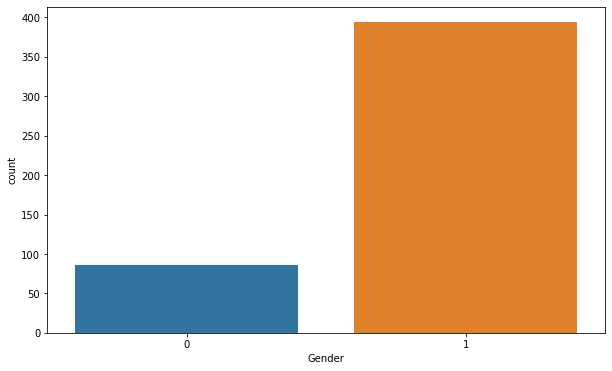

In [347]:
sns.countplot(x='Gender',data=df)

<AxesSubplot:xlabel='Credit_History', ylabel='LoanAmount'>

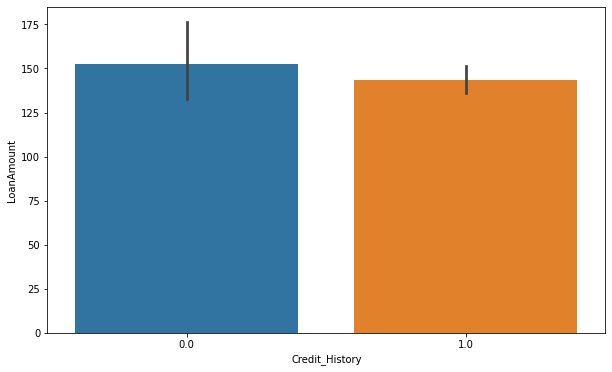

In [324]:
sns.barplot(x='Credit_History',y='LoanAmount',data=df)

Text(0.5, 1.0, 'Creditability')

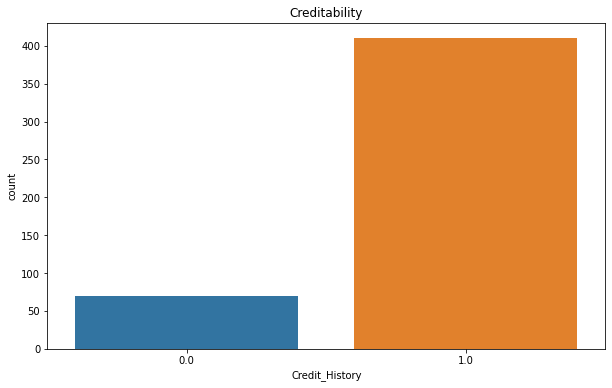

In [325]:
sns.countplot(x='Credit_History',data=df)
plt.title("Creditability")

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

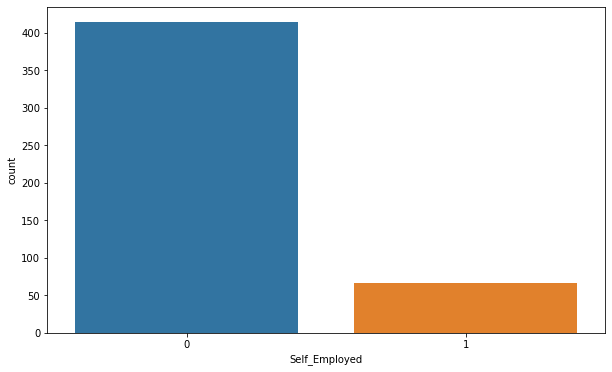

In [326]:
sns.countplot(x='Self_Employed',data=df)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

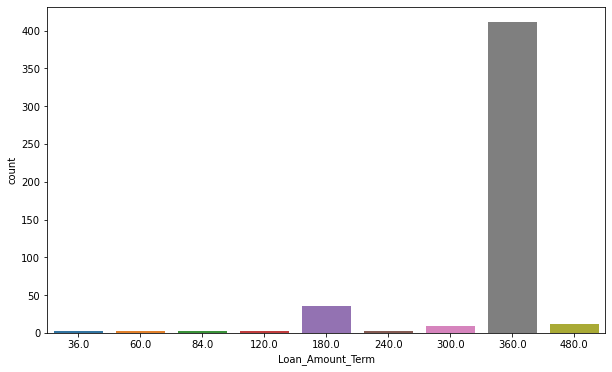

In [327]:
sns.countplot(x='Loan_Amount_Term',data=df)

In [328]:
df['Loan_Amount_Term'].max()

480.0

In [329]:
def answer_one():
    return df['Loan_Amount_Term'].max()
answer_one()

480.0

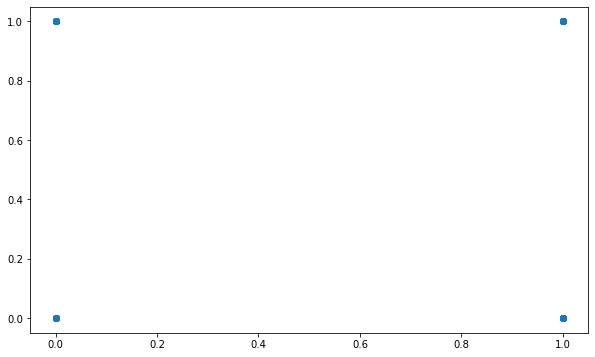

In [330]:
plt.scatter(df.Self_Employed,df.Credit_History)

                ApplicantIncome  CoapplicantIncome  LoanAmount  \
Credit_History                                                   
0.0                          70                 70          70   
1.0                         410                410         410   

                Loan_Amount_Term  Gender  Self_Employed  Semiurban  Urban  \
Credit_History                                                              
0.0                           70      70             70         70     70   
1.0                          410     410            410        410    410   

                Loan_Status  
Credit_History               
0.0                      70  
1.0                     410  


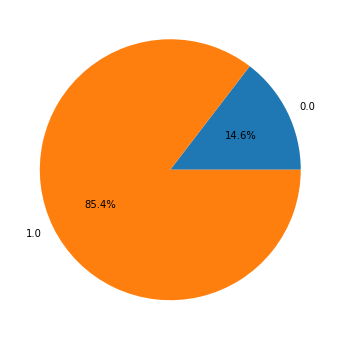

In [331]:
x=df.groupby('Credit_History').agg('count')
print(x)
labels=x.LoanAmount.sort_values().index
counts=x.LoanAmount.sort_values()
plt.pie(counts,labels=labels,autopct='%1.1f%%')
plt.show()

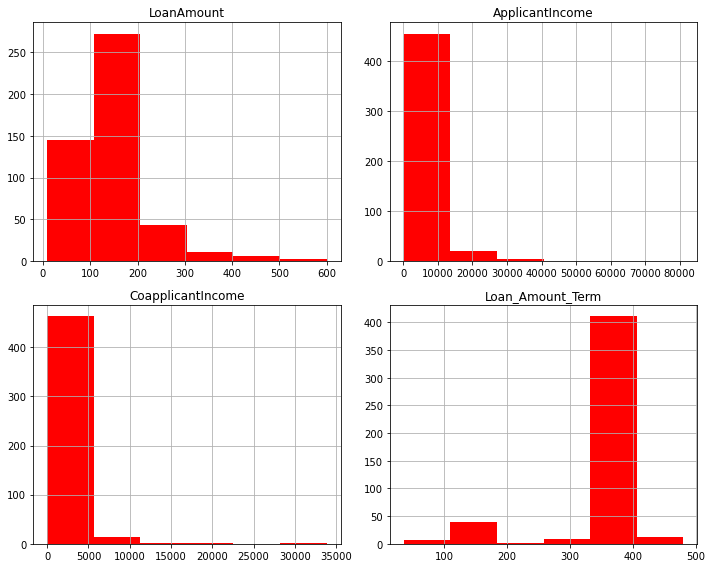

In [332]:
#Univariate analysis
df[['LoanAmount','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']].hist(figsize=(10,8),bins=6,color='r')
#2plt.figure(figsize=(10,8))
plt.tight_layout()
plt.show()

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    480 non-null    float64
 1   CoapplicantIncome  480 non-null    float64
 2   LoanAmount         480 non-null    float64
 3   Loan_Amount_Term   480 non-null    float64
 4   Credit_History     480 non-null    float64
 5   Gender             480 non-null    uint8  
 6   Self_Employed      480 non-null    uint8  
 7   Semiurban          480 non-null    uint8  
 8   Urban              480 non-null    uint8  
 9   Loan_Status        480 non-null    uint8  
dtypes: float64(5), uint8(5)
memory usage: 41.0 KB


In [353]:
#outlier Identification

#we are using this function for indentifying outliers

def outliers_summary(df,column):
    print(column,end=":")
    Q1=np.quantile(df[column],0.25)
    Q3=np.quantile(df[column],0.75)
    IQR=Q3-Q1
    Lbound=Q1-(1.5*IQR)
    Ubound=Q3+(1.5*IQR)
    if df[column].min()<Lbound or df[column].max()>Ubound:print("There are outliers")
    else:print("No Outlier Present")

In [349]:
outliers_summary(df,"Gender")
outliers_summary(df,"Self_Employed")
outliers_summary(df,"ApplicantIncome")
outliers_summary(df,"CoapplicantIncome")
outliers_summary(df,"LoanAmount")
outliers_summary(df,"Loan_Amount_Term")
outliers_summary(df,"Credit_History")
outliers_summary(df,"Loan_Status")

Gender:There are outliers
Self_Employed:There are outliers
ApplicantIncome:There are outliers
CoapplicantIncome:There are outliers
LoanAmount:There are outliers
Loan_Amount_Term:There are outliers
Credit_History:There are outliers
Loan_Status:No Outlier Present


In [354]:
#we are using this function to check the details of the outliers

def checkoutliers(df,column):
    print("checking outlier for",column,":")
    Q1=np.quantile(df[column],0.25)
    Q3=np.quantile(df[column],0.75)
    IQR=Q3-Q1
    Lbound=Q1-(1.5*IQR)
    Ubound=Q3+(1.5*IQR)
    print("Q1 is",Q1)
    print("Q3 is",Q3)
    print("IQR is",IQR)
    print("Lbound is",Lbound)
    print("Ubound is",Ubound)
    print("minimum is",df[column].min())
    rint("maximum is",df[column].max())
    if df[column].min()<Lbound or df[column].max()>Ubound:
        print("Their are outliers")

In [351]:
#now calculating the outlier percentage
L=df[column][df[column]>Ubound].count()
U=df[column][df[column]<Lbound].count()
Total=L+U
outlierpercent=(Total/df[column].count())*100
print("No. of Outlier is",Total)
print("outlier present is",round(outlierpercent,2),"%")

NameError: name 'column' is not defined

In [355]:
#data Distribution
# Transforming skewed distribution to normal distribution
#outlier Treatment

def Outlier_Treatment(df,column):
    l=column + "_log10"
    ks=column + "_sqrt"
    c=column + "_cbrt"
    log=np.log10(df[column])
    sqrt=np.sqrt(df[column])
    cbrt=np.cbrt(df[column])
    log_skew=abs(log.skew())
    sqrt_skew=abs(sqrt.skew())
    cbrt_skew=abs(cbrt.skew())
    print("skewness of")
    print("log10 of",column,":",log_skew)
    print("squre root of",column,":",sqrt_skew)
    print("cube root of",column,":",cbrt_skew,"\n")
    if abs(log_skew)<abs(sqrt_skew) and abs(log_skew)<abs(cbrt_skew):
        df[column]=log
        df=df.rename(column={column:l},inplace=True)
    elif abs(sqrt_skew)<abs(log_skew) and abs(sqrt_skew)<abs(cbrt_skew):
        df[column]=sqrt
        df=df.rename(column={column:s},inplace=True)
    else:
        df[column]=cbrt
        df=df.rename(column={column:c},inplace=True)
        
        #this function is used to treat outliers and reduce skewness of the data

In [358]:
Outlier_Treatment(df,"ApplicantIncome")
df.head(5)

skewness of
log10 of ApplicantIncome : 0.09733197087807739
squre root of ApplicantIncome : 0.2619513700339758
cube root of ApplicantIncome : 0.1498515527073638 



TypeError: rename() got an unexpected keyword argument 'column'

In [333]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Self_Employed,Semiurban,Urban,Loan_Status
ApplicantIncome,1.000000,-0.042080,0.495310,-0.010838,-0.056152,0.032644,0.170785,0.000551,-0.044767,-0.043152
CoapplicantIncome,-0.042080,1.000000,0.202522,-0.012175,-0.012006,0.095027,0.028871,-0.003491,0.022206,-0.082433
LoanAmount,0.495310,0.202522,1.000000,0.050867,-0.040773,0.098975,0.120389,0.013365,-0.098826,-0.071753
Loan_Amount_Term,-0.010838,-0.012175,0.050867,1.000000,0.032937,-0.088704,-0.034852,0.030346,-0.065097,-0.007798
Credit_History,-0.056152,-0.012006,-0.040773,0.032937,1.000000,0.022447,-0.023568,0.046480,-0.027062,0.529390
Gender,0.032644,0.095027,0.098975,-0.088704,0.022447,1.000000,-0.002761,-0.108538,0.057137,0.064504
Self_Employed,0.170785,0.028871,0.120389,-0.034852,-0.023568,-0.002761,1.000000,-0.015604,-0.034261,-0.034715
Semiurban,0.000551,-0.003491,0.013365,0.030346,0.046480,-0.108538,-0.015604,1.000000,-0.548096,0.155686
Urban,-0.044767,0.022206,-0.098826,-0.065097,-0.027062,0.057137,-0.034261,-0.548096,1.000000,-0.055964
Loan_Status,-0.043152,-0.082433,-0.071753,-0.007798,0.529390,0.064504,-0.034715,0.155686,-0.055964,1.000000


<AxesSubplot:>

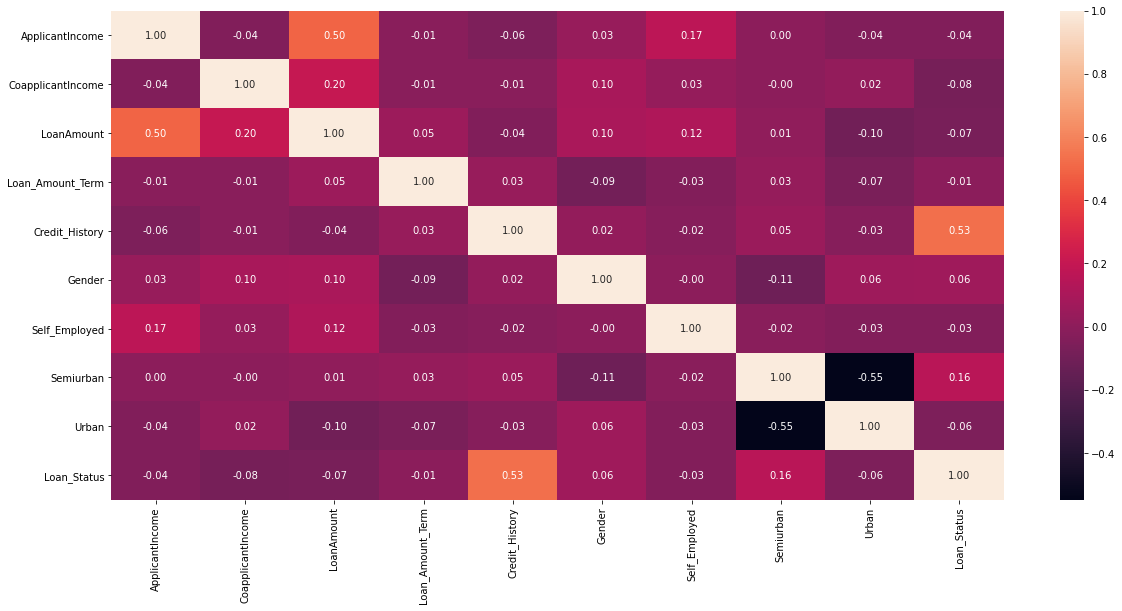

In [334]:
corr = df.corr()
plt.figure(figsize=(20,9))
sns.heatmap(corr, annot=True, fmt='.2f')

ApplicantIncome
6.895392015297448


<Figure size 720x432 with 0 Axes>

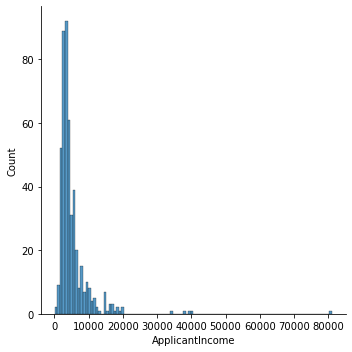

CoapplicantIncome
8.008012551375304


<Figure size 720x432 with 0 Axes>

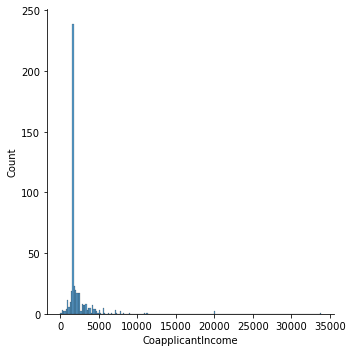

LoanAmount
2.3540509424728953


<Figure size 720x432 with 0 Axes>

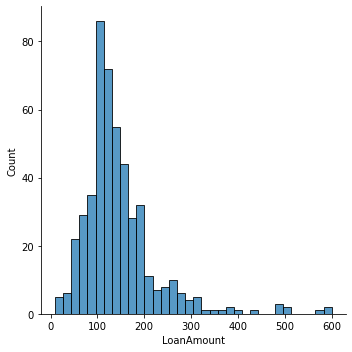

Loan_Amount_Term
-2.326411237343808


<Figure size 720x432 with 0 Axes>

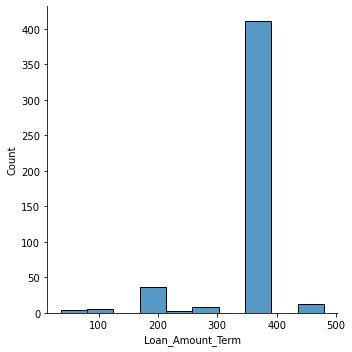

Credit_History
-2.0069565427432474


<Figure size 720x432 with 0 Axes>

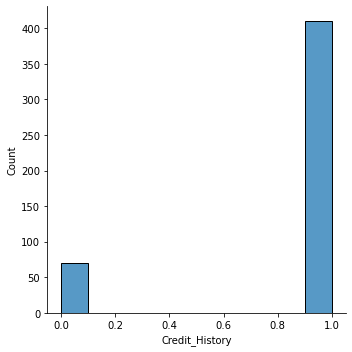

Gender
-1.6732212825900636


<Figure size 720x432 with 0 Axes>

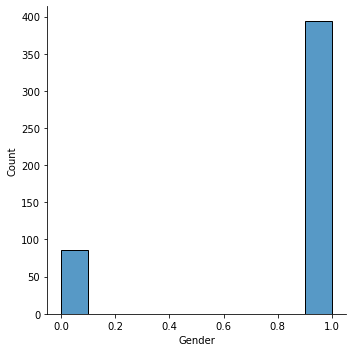

Self_Employed
2.10526662505782


<Figure size 720x432 with 0 Axes>

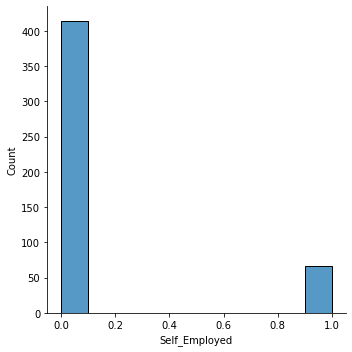

Semiurban
0.4171194783450428


<Figure size 720x432 with 0 Axes>

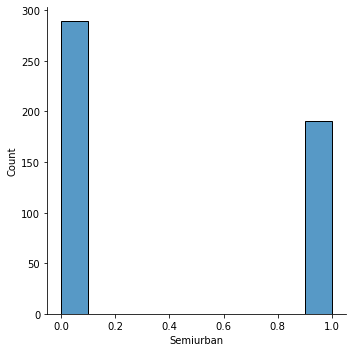

Urban
0.8090398349558905


<Figure size 720x432 with 0 Axes>

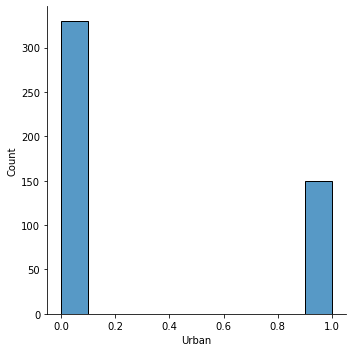

Loan_Status
-0.8300761264928438


<Figure size 720x432 with 0 Axes>

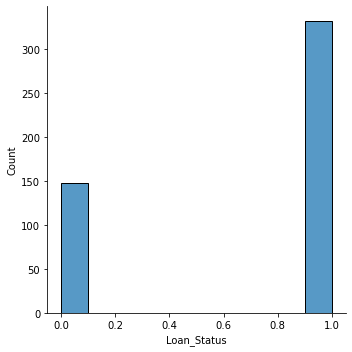

In [335]:
from scipy.stats import skew
for col in df:
    print(col)
    print(skew(df[col]))
    plt.figure()
    sns.displot(df[col])
    plt.show()

In [336]:
from scipy.stats import skew
df["LoanAmount"]=np.log(df["LoanAmount"])
skew(df["LoanAmount"])

-0.4191562307692124

In [337]:
df["ApplicantIncome"]=np.log(df["ApplicantIncome"])
skew(df["ApplicantIncome"])

0.5611307590234634

In [338]:
df["CoapplicantIncome"]=np.log(df["CoapplicantIncome"])
skew(df["CoapplicantIncome"])

-0.5030445766067452

In [339]:
df.skew()

ApplicantIncome      0.562891
CoapplicantIncome   -0.504623
LoanAmount          -0.420471
Loan_Amount_Term    -2.333710
Credit_History      -2.013253
Gender              -1.678471
Self_Employed        2.111872
Semiurban            0.418428
Urban                0.811578
Loan_Status         -0.832681
dtype: float64

In [340]:
df.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Self_Employed,Semiurban,Urban,Loan_Status
1,8.430109,7.318540,4.852030,360.0,1.0,1,0,0,0,0
2,8.006368,7.365872,4.189655,360.0,1.0,1,1,0,1,1
3,7.856707,7.765569,4.787492,360.0,1.0,1,0,0,1,1
4,8.699515,7.365872,4.948760,360.0,1.0,1,0,0,1,1
5,8.597297,8.341887,5.587249,360.0,1.0,1,1,0,1,1


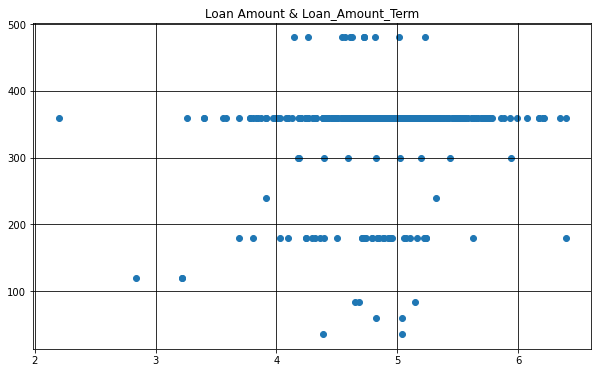

In [341]:
plt.scatter(df.LoanAmount,df.Loan_Amount_Term)
plt.title("Loan Amount & Loan_Amount_Term")
plt.grid(True,color='k')

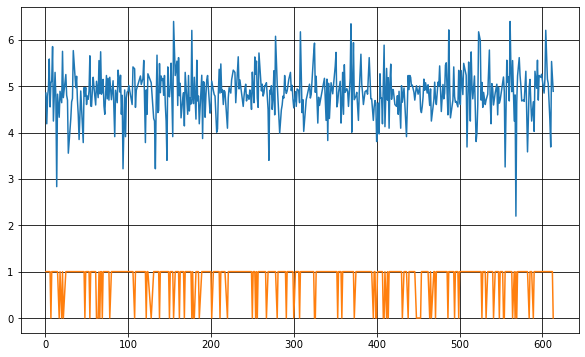

In [342]:
from matplotlib import rcParams
rcParams['figure.figsize']=10,6
plt.plot(df.LoanAmount)
plt.plot(df.Credit_History)
plt.grid(True,color='k')

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    480 non-null    float64
 1   CoapplicantIncome  480 non-null    float64
 2   LoanAmount         480 non-null    float64
 3   Loan_Amount_Term   480 non-null    float64
 4   Credit_History     480 non-null    float64
 5   Gender             480 non-null    uint8  
 6   Self_Employed      480 non-null    uint8  
 7   Semiurban          480 non-null    uint8  
 8   Urban              480 non-null    uint8  
 9   Loan_Status        480 non-null    uint8  
dtypes: float64(5), uint8(5)
memory usage: 41.0 KB


In [344]:
#train data
from sklearn.model_selection import train_test_split
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']
#from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(solver='lbfgs',max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [345]:
predictions=logmodel.predict(X_test)
#print(predictions,':',y_test)
#predictions
y_test

378    0
365    0
47     1
487    0
552    1
      ..
159    1
31     0
15     1
76     0
370    1
Name: Loan_Status, Length: 144, dtype: uint8

In [346]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7777777777777778